## Часть 1. Гауссовы квадратуры

Метод Гауссовых квадратур является одним из методов численного интегрирования, который позволяет увеличить точность интегрирования, используя ортогональные полиномы и их корни в качестве узлов.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

здесь $\omega$ - функция весов, которая определят базис ортогональных полиномов, чьи корни используются в качестве узлов интегрирования. Если функция $f(x)$ является полиномом, тогда такой метод интегрирования даст *точное* решение интеграла.

Например, давайте посчитаем следующий интеграл:

$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Здесь функция уже полиномиальна, поэтому возьмем весовую функцию $\omega(x) = 1$. Тогда вычисление интеграла сводится к сумме корней полинома, соответствующих весовой функции $\omega(x) = 1$. Например, здесь https://dlmf.nist.gov/18.3 вы можете увидеть, какой базис полиномов соответствует вашей весовой функции.

Заметим, что нашей соответствуют полиномы Лежандра. Теперь, зайдем в документацию https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Функция *roots_legendre* сразу же выдаст корни полиномов Лежандра, а также веса к их корням (для полиномов Лежандра все эти веса равны единице).

###  Задание 1.1

1. Посчитайте точное значение интеграла ([1](#mjx-eqn-eq1)) "руками". Сравните его с полученным численным значением.

In [137]:
#посчитав руками и, на всякий случай, вольфрамом, получаем 2/3

2. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя обычный метод интегрирования на равномерной сетке (например, написанный вами в week_6_calculus). Оцените количество узлов, необходимых для достижения относительной точности $10^{-10}$.

In [138]:
import numpy as np
def midpoint_rule(func, a, b, eps):


        mid = float((a + b) / 2)
        temp = func( mid )
        S = (b - a) * temp
        num = 2

        while True:

            h = (b - a) / num
            dots = np.linspace(a + h/2, b - h/2, num)
            SS  = h * np.sum( func(dots) )

            if abs(SS - S) < eps:
                
                return S, num

            else:
                S = SS
                num *= 2


def func(x):
    
    res = 7 * x**3 - 8 * x**2 - 3 * x + 3
    return res

midpoint_rule(func, -1, 1, 1e-10)

(0.6666666667442769, 524288)

3. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя корни полинома Лежандра степени от 1 до 6 в качестве узлов (чтобы получить корни и веса используйте scipy.special.roots_legendre)

In [139]:
from scipy.special import roots_legendre

for n in range(1, 7):
    
    x, w = roots_legendre(n)
    print('n = {}, Int: {} \n'.format(n, sum(w * func (x))))

n = 1, Int: 6.0 

n = 2, Int: 0.6666666666666674 

n = 3, Int: 0.6666666666666639 

n = 4, Int: 0.6666666666666667 

n = 5, Int: 0.6666666666666685 

n = 6, Int: 0.6666666666666695 



Сравните количество узлов, необходимых для достижения одинаковой точности в обоих чисенных методах.

(20% итоговой оценки)

In [140]:
# Как видно из выводов предыдущих окон, в то время как певому методу необходимо 524288 узлов, методу, использующему полиному лежандра - всего 2 точки. Выгодно!

###  Задание 1.2

Вычислите значение того же интеграла, но на интервале от 0 до 10.

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Заметим, что больше нельзя использовать полиномы Лежанда, потому что они определены на интервале (-1, 1). Однако всегда можно произвести *аффинное преобразование* (преобразование не меняет область интегрирования) для того, чтобы перейти к желаемой системе координат.

(20% итоговой оценки)

In [63]:
print( 'old:', midpoint_rule(func, 0, 10, 1e-10) )

def func_mod(x):
    xx = 5 * x + 5
    return 7 * xx**3 - 8 * xx**2 - 3 * xx + 3

ndss, wghtss = roots_legendre(2)
intg = (func_mod(ndss) * wghtss).sum()

print('new: ', 5 * intg)

print('difference btw new and true: ', np.abs(44140 / 3 - 5 * intg))

# почти "ничтожно мала"

old: (14713.333333333123, 16777216)
new:  14713.333333333336
difference btw new and true:  1.8189894035458565e-12


Сравните результат с точным значением интеграла.

### Задание 1.3

Вычислите значение следующиего интеграла:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
используя соответствующий базис ортогональных полиномов.
Найдите степень полинома (количество узлов), при которой точность превысит ошибку плавающей точки.

(20% итоговой оценки)

In [62]:
from scipy.special import roots_chebyt
from scipy.special import jv

true = np.pi / 2 * jv( 0, 2 * np.pi )

print ('we know the truth:', true)

def f(x):
    
    return np.cos(2 * np.pi * x)



for i in range(1, 21):
    
    nods, weigs = roots_chebyt(i)
    
    res = sum ([ (f (nods[j]) * weigs[j]) for j in range ( len(nods) ) ])
    res *= 1 / 2
    
    if (np.abs(res - true) <= 1e-15):
        
        print('num of nodes', i, 'res:', res, 'err:', res - true)
    
    else :
        
        continue
        
#видим, что при 14 узлах уже порядок 1e-16

we know the truth: 0.34601015881226427
num of nodes 14 res: 0.3460101588122638 err: -4.440892098500626e-16
num of nodes 15 res: 0.34601015881226416 err: -1.1102230246251565e-16
num of nodes 16 res: 0.3460101588122642 err: -5.551115123125783e-17
num of nodes 17 res: 0.3460101588122644 err: 1.1102230246251565e-16
num of nodes 18 res: 0.3460101588122643 err: 5.551115123125783e-17
num of nodes 19 res: 0.3460101588122642 err: -5.551115123125783e-17
num of nodes 20 res: 0.3460101588122645 err: 2.220446049250313e-16


## Часть 2. Уравение Фредгольма

Существует два типа уравнений Фредгольма: 

1. Уравение Фредгольма первого рода:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Уравнение Фредгольма второго рода:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Здесь функция $f(x)$ неизвестна, $K(x, t)$ - ядро уравнения, заданная функция $g(x)$ и $\lambda$ - рациональное число.
С точки зрения вычислений, уравение Фредгольма первого рода крайне неустойчиво. Далее мы рассмотрим только уравнение второго рода.

Основная идея - аппроксимировать интеграл некой квадратурной формулой

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

с подходящими весами $w_j$ и узлами $t_j$, $j=1, \dots, N$. Точность аппроксимации контролируется $N$.

Таким образом, уравнение Фредгольма приближается следующим образом:

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Отметим, что $x$ - непрерывная переменная, в то время, как $t$ - дискретная.

Оценивая данное уравнение на сетке $x = t_k$, получаем

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

где $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. Это ничто иное, как система линейных алгебраических уравнений на вектор $\color{blue}{f_j}$.

Ее решение выдает значение неизвестной функции $f(x)$ в дискретных точках $x=t_j$ для $j=1, \dots, N$.

### Задание 2.1

Решите предложенное уравнение Фредгольма второго рода

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Здесь $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, ядро $K(x, t) = 1$ и правая часть - $g(x) = \sin(\pi x)$.

Точное решение (Сборник задач по интегральным уравнениям, 2006, стр. 5):

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

Для нахождения интеграла воспользуйтесь Гауссовой квадратурой с весовой функцией $w(x) = 1$ на $(0, 1)$. Посмотрите на http://dlmf.nist.gov/18.3, и найдите соответствующую функцию в *scipy.special* (обратите внимание на область интегрирования).

Сравните полученные значения функции с точным решением для разных значений $N$. На каком $N$ можно остановиться?

(20% итоговой оценки)

In [116]:
from scipy.special import roots_sh_legendre

def build (i):
    
    nd, wg = roots_sh_legendre(i)
    
    cff = np.ones(i)
    cff.shape = (i, 1)
    wg.shape = (1, i)

    res = np.eye(i)
    res -= 1/2 * cff @ wg # lamda 1/2
    out = np.linalg.solve(res, np.sin(np.pi * nd))
    
    return nd, out
    
    
for i in range(1, 21):
    
    tem = np.sin(build(i)[0] * np.pi)
    tem += 2 / np.pi
    print( 'num steps', i, np.linalg.norm( tem - build(i)[1] ) )

    
    ## so after 8 steps there is no need to go further

num steps 1 0.3633802276324185
num steps 2 0.02889134205974216
num steps 3 0.0007657482051929123
num steps 4 1.0040475654726766e-05
num steps 5 7.849635624023041e-08
num steps 6 4.0756990465418004e-10
num steps 7 1.5067889628379886e-12
num steps 8 3.0384433154848642e-15
num steps 9 5.087681048627601e-16
num steps 10 2.596593065790409e-15
num steps 11 3.3306690738754696e-16
num steps 12 1.9735756178897087e-15
num steps 13 1.2658490090568385e-15
num steps 14 7.364386412590295e-16
num steps 15 8.005932084973442e-16
num steps 16 5.9113511916449366e-15
num steps 17 3.599246473628376e-15
num steps 18 1.566162308693318e-15
num steps 19 6.4688952558876586e-15
num steps 20 3.1616999831336794e-15


### Задание 2.2

Очевидной проблемой предыдущего результата для $f(x)$ является то, что он возвращает решения на фиксированном наборе точек. Мы не контролируем их точное расположение.

1. Для начала, попробуйте интерполировать значения, полученные в предыдущем пункте на равномерной сетке длиной 50. Можете использовать любой метод интерполяции. Сравните интерполяцию с точным значением.

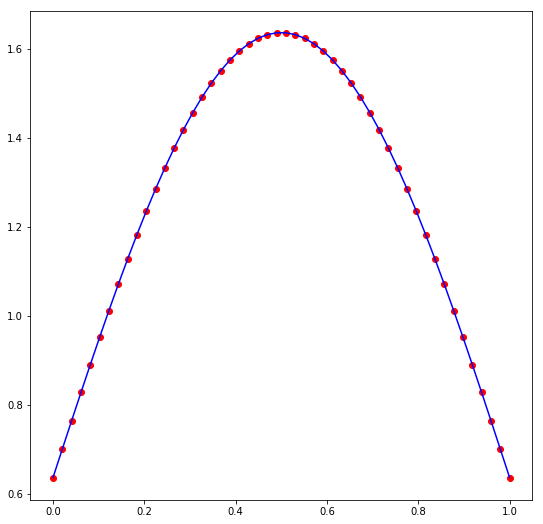

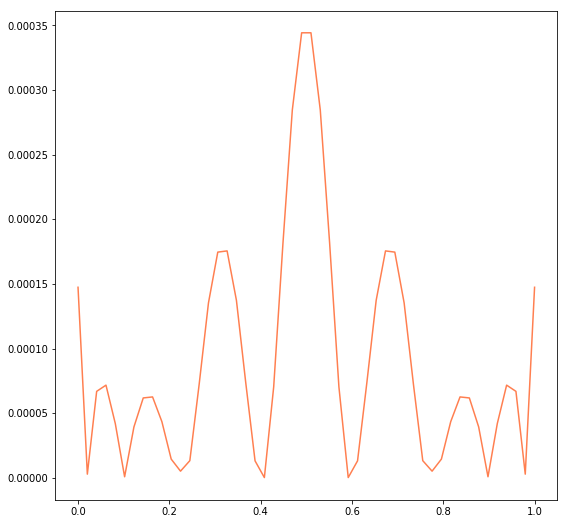

In [128]:
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def sinnew(x):
    return np.sin( x * np.pi )
    
plt.figure( figsize = (9, 9) )

interpol = CubicSpline( build(8)[0], build(8)[1])

plt.plot(x, interpol(x), 'o', color = 'red')
plt.plot(x,  sinnew(x) + 2 / np.pi, color = 'blue')

plt.figure(figsize = (9, 9) )
plt.plot(x, abs( interpol(x) - sinnew(x) - 2 / np.pi), color = 'coral')

2. Теперь используйте следующую формулу, чтобы вычислить значение функции на той же равномерной сетке.

$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$

Сравните эту интерполяцию с точным значением, а также с прямым интерполяционным методом.

(20% итогой оценки)

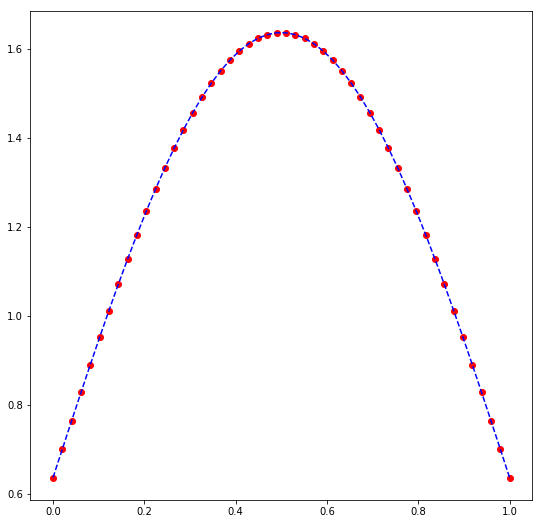

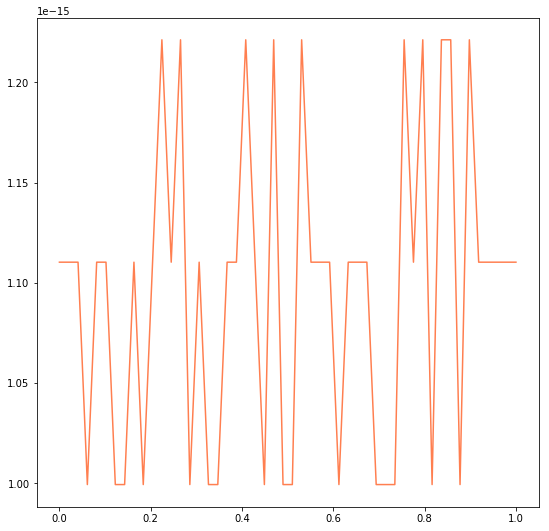

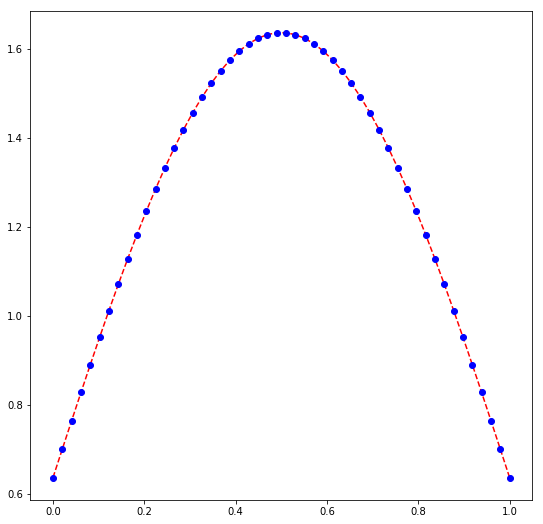

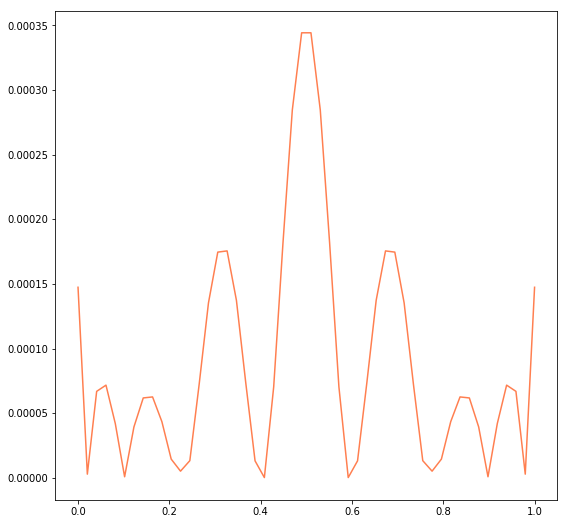

In [136]:
plt.figure( figsize = (9, 9) )

x = np.linspace(0, 1, 50)

с = np.linalg.norm((build(8)[0] * build(8)[1]) / 2) #второе слагаемое
    
def fnew(x):

        return np.sin(np.pi * x) + c



plt.plot(x, fnew(x), 'o', color = 'red')
plt.plot(x, sinnew(x) + 2 / np.pi, '--', color = 'blue')

plt.figure(figsize = (9, 9) )
plt.plot(x, abs( fnew (x) - sinnew(x) - 2 / np.pi), color = 'coral')

plt.figure(figsize = (9, 9) )
plt.plot(x, fnew(x), '--', color = 'red')
plt.plot(x, interpol(x), 'o', color = 'blue')

plt.figure( figsize = (9, 9) )
plt.plot(x, abs( fnew (x) - interpol(x) ), color = 'coral')

#success
#Отличие при сравнении различных способов интерполяции разница от 1е-4 до 1е-6, что не очень здорово, но при сравнении  в истнным значене уже порядок 1е-16, так что все отлично!